# OSE-Summer School 2019
## Wk3: ECON DSGE PS2, Linearization, Kerk Phillips

In [1]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import fsolve
import sys

### Exerciese 1

In the steady state, $\bar{K} = (\alpha \beta)^{\frac{1}{1-\alpha}}$. Thus,

$ F = \frac{\beta \alpha \bar{K}^{\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} = \frac{1}{(\alpha \beta)^{\frac{\alpha}{1-\alpha}} - (\alpha \beta)^{\frac{1}{1-\alpha}}} $

$ G = - \frac{\beta \alpha \bar{K}^{\alpha-1} (\alpha+\bar{K}^{\alpha-1})}{\bar{K}^{\alpha} - \bar{K}} = -F(\alpha + (\alpha \beta)^{-1}) $

$ H = \frac{\beta \alpha^{2} \bar{K}^{2(\alpha-1)}}{\bar{K}^{\alpha}-\bar{K}} = F/\beta $

$ L = -\frac{\beta \alpha \bar{K}^{\alpha}}{\bar{K}^{\alpha} - \bar{K}} = F(\alpha \beta)^{\frac{1}{1-\alpha}} $

$ M = \frac{\alpha \beta \bar{K}^{2\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} =F\bar{K}^{\alpha} = F(\alpha \beta)^{\frac{\alpha}{(1-\alpha)}} $

$ N = \rho $

$ P = \frac{-G \pm \sqrt{G^{2} - 4FH}}{2F} $

$ Q = -\frac{LN+M}{FN+FP+G} $


In [2]:
# parameters
α, β, ρ, σ = (0.35, 0.98, 0.95, 0.02)

# compute values of F,G,H,L,M,N,P and Q
F = 1 / ((α*β)**(α/(1-α))) - (α*β)**(1/(1-α))
G = -F * (α+(α*β)**(-1))
H = F / β
L = F * (α*β)**(1/(1-α))
M = F * (α*β)**(α/(1-α))
N = ρ

P_plus = (-G + (G**2 - 4*F*H)**(1/2)) / (2*F)
P_minus = (-G - (G**2 - 4*F*H)**(1/2)) / (2*F)

if np.abs(P_plus) < 1:
    P = P_plus
else:
    P = P_minus

Q = -(L*N + M) / (F*N + F*P + G)

print("[   F,     G,     H,     L,     M,     N,     P,     Q   ] = ")
print(np.round([F,G,H,L,M,N,P,Q],3))

[   F,     G,     H,     L,     M,     N,     P,     Q   ] = 
[ 1.586 -5.18   1.619  0.306  0.892  0.95   0.35   0.379]


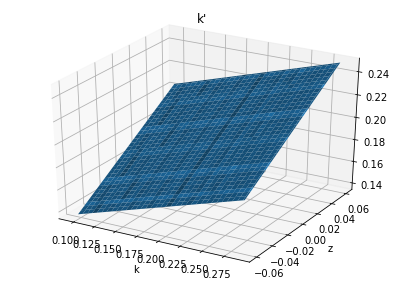

In [3]:
# policy function (k'= K(k,z))

kss = (α*β)**(1/(1-α))
kgrid = np.linspace(kss*0.5, kss*1.5, 101)
zgrid = np.linspace(-3*σ, 3*σ, 101)
kp_approx = np.zeros((len(kgrid),len(zgrid)))

for ik in range(len(kgrid)):
    k = kgrid[ik]
    for iz in range(len(zgrid)):
        z = zgrid[iz]
        kp_approx[ik,iz] = kss + P*(k-kss) + Q*z

K,Z = np.meshgrid(kgrid,zgrid)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
sub = ax.plot_surface(K, Z, kp_approx)
plt.xlabel("k"); plt.ylabel("z"); plt.title("k'")
plt.show()

### Exercise 2

Since $K=e^{k}$, the Euler equation becomes:

$$ \mathbb{E}_{t} \bigg[ \beta \frac{\alpha e^{z_{t+1}+(\alpha-1)k_{t+1}} (e^{z_{t}+\alpha k_{t}} - e^{k_{t+1}})}{e^{z_{t+1}+\alpha k_{t+1}} - e^{k_{t+2}}} \bigg] = 1 $$


Notice that $e^{\bar{k}} = \bar{K}$. Therefore,

$ F = \frac{\beta \alpha \bar{K}^{\alpha}}{\bar{K}^{\alpha}-\bar{K}} = \frac{\alpha \beta}{1-\alpha\beta} $

$ G = - \frac{\beta \alpha \bar{K}^{\alpha} (\alpha+\bar{K}^{\alpha-1})}{\bar{K}^{\alpha} - \bar{K}} = -F(\alpha + (\alpha \beta)^{-1}) $

$ H = \frac{\beta \alpha^{2} \bar{K}^{2\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} = F/\beta $

$ L = -\frac{\beta \alpha \bar{K}^{\alpha}}{\bar{K}^{\alpha} - \bar{K}} = -F $

$ M = \frac{\alpha \beta \bar{K}^{2\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} = H\alpha = F\alpha/\beta $

$ N = \rho $

$ P = \frac{-G \pm \sqrt{G^{2} - 4FH}}{2F} $

$ Q = -\frac{LN+M}{FN+FP+G} $

Then, $ \tilde{k}_{t+1} = P\tilde{k}_{t} + Q\tilde{z}_{t} $, which is equivalent to $ K_{t+1} = \exp \big({\ln{\bar{K}} + P(\ln{K_{t}} - \ln{\bar{K}}) + Qz_{t}} \big) $.


In [4]:
# parameters
α, β, ρ, σ = (0.35, 0.98, 0.95, 0.02)

# compute values of F,G,H,L,M,N,P and Q
F = (α*β) / (1-α*β)
G = -F * (α+(α*β)**(-1))
H = F/β
L = -F
M = F*α/β
N = ρ

P_plus = (-G + (G**2 - 4*F*H)**(1/2)) / (2*F)
P_minus = (-G - (G**2 - 4*F*H)**(1/2)) / (2*F)

if np.abs(P_plus) < 1:
    P = P_plus
else:
    P = P_minus

Q = -(L*N + M) / (F*N + F*P + G)

print("[   F,     G,     H,     L,     M,     N,     P,     Q   ] = ")
print(np.round([F,G,H,L,M,N,P,Q],3))

[   F,     G,     H,     L,     M,     N,     P,     Q   ] = 
[ 0.522 -1.705  0.533 -0.522  0.186  0.95   0.35  -0.302]


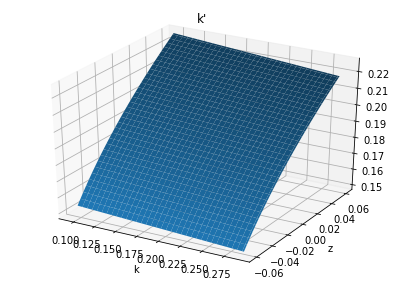

In [5]:
# policy function (k'= K(k,z))

kss = (α*β)**(1/(1-α))
kgrid = np.linspace(kss*0.5, kss*1.5, 101)
zgrid = np.linspace(-3*σ, 3*σ, 101)
kp_log_approx = np.zeros((len(kgrid),len(zgrid)))

for ik in range(len(kgrid)):
    k = kgrid[ik]
    for iz in range(len(zgrid)):
        z = zgrid[iz]
        kp_log_approx[ik,iz] = np.exp(np.log(kss) + P*(np.log(k)-np.log(kss)) + Q*z)

K,Z = np.meshgrid(kgrid,zgrid)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
sub = ax.plot_surface(K, Z, kp_log_approx)
plt.xlabel("k"); plt.ylabel("z"); plt.title("k'")
plt.show()

### Exercise 3

Since $ \tilde{X}_{t} = P\tilde{X}_{t-1} + Q\tilde{Z}_{t} $, $ \tilde{Z}_{t} = N\tilde{Z}_{t-1} + \epsilon_{t}$, and $ \mathbb{E}\epsilon_{t} = 0 $,

\begin{align}
&\mathbb{E}_{t} \big[ F\tilde{X}_{t+1} + G\tilde{X}_{t} + H\tilde{X}_{t-1} + L\tilde{Z}_{t+1} + M\tilde{Z}_{t} \big] \\
&= \mathbb{E}_{t} \big[ F(P\tilde{X}_{t} + Q\tilde{Z}_{t+1}) + G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) + H\tilde{X}_{t-1} + L(N\tilde{Z}_{t}+\epsilon_{t}) + M\tilde{Z}_{t} \big] \\
&= FP(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) + FQN\tilde{Z}_{t} + GP\tilde{X}_{t-1} + GQ\tilde{Z}_{t} + H\tilde{X}_{t-1} + LN\tilde{Z}_{t} + M\tilde{Z}_{t} \\
&= [FP^{2} + GP + H]\tilde{X}_{t-1} + [(FQ+L)N + (FP+G)Q + M]\tilde{Z}_{t} = 0
\end{align}

### Exercise 4

In [6]:
# Parameters
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
zss = 0
ρ = 0.9
τ = 0.05

params = (α,β,γ,δ,ξ,τ,a,zss)

In [7]:
# numerical solution
def steady_state_ex4(var, *args):
    
    r,k,l,w,c,T = var
    α,β,γ,δ,ξ,τ,a,z = args
    
    eq1 = 1 - β * ((r-δ)*(1-τ) + 1)
    eq2 = a * ((1-l)**(-ξ)) - (c**(-γ))*w*(1-τ)
    eq3 = r - α * (k**(α-1)) * ((l*np.exp(z))**(1-α))
    eq4 = w - (1-α) * (k**α) * (l**(-α)) * np.exp(z*(1-α))
    eq5 = T - τ * (w*l + (r-δ)*k)
    eq6 = c - (1-τ) * (w*l + (r-δ)*k) - T

    return (eq1, eq2, eq3, eq4, eq5, eq6)

rss, kss, lss, wss, css, Tss = fsolve(steady_state_ex4, (0.2, 1, 0.5, 1, 1, 0.1), params)
Oss = kss**α * lss**(1-α)
iss = δ*kss

print("[Steady state values]")
print("")
print('interest rate(r): %5.3f' % rss)
print('capital stock(k): %5.3f' % kss)
print('labor(l)        : %5.3f' % lss)
print('wage(w)         : %5.3f' % wss)
print('consumption(c)  : %5.3f' % css)
print('tax revenue(T)  : %5.3f' % Tss)
print('output(O)       : %5.3f' % Oss)
print('investment(i)   : %5.3f' % iss)
print("")

[Steady state values]

interest rate(r): 0.121
capital stock(k): 4.225
labor(l)        : 0.580
wage(w)         : 1.328
consumption(c)  : 0.861
tax revenue(T)  : 0.043
output(O)       : 1.283
investment(i)   : 0.423



### Exercise 5

In [8]:
def compute_ss(params):
    
    α,β,γ,δ,ξ,τ,a,zss = params
    init_guess = [0.2, 1, 0.5, 1, 1, 0.2]
    
    # compute the steady state given parameters
    rss, kss, lss, wss, css, Tss = fsolve(steady_state_ex4, init_guess, params)
    
    # compute output(Oss) and investment(iss)
    Oss = kss**α * (lss*np.exp(zss))**(1-α)
    iss = δ*kss
    
    return (rss, kss, lss, wss, css, Tss, Oss, iss)

In [9]:
# compute derivatives using numerical differentiation
init_ss = [rss, kss, lss, wss, css, Tss, Oss, iss]
ϵ = 0.0001
Etuple = (0,) * (len(init_ss)-1) + (ϵ,)*1 + (0,) * (len(init_ss)-1)
ay_ax = np.zeros((len(params),len(init_ss)))

for ix in range(len(params)):
    
    E = Etuple[len(params)-1-ix : len(Etuple)-ix]
    params_up = tuple(np.add(params, E))
    params_down = tuple(np.subtract(params, E))
    
    r, k, l, w, c, T, O, i = compute_ss(params_up)
    ss_up = [r, k, l, w, c, T, O, i]
    
    r, k, l, w, c, T, O, i = compute_ss(params_down)
    ss_down = [r, k, l, w, c, T, O, i]
    
    for iy in range(len(init_ss)):
        ay_ax[ix,iy] = (ss_up[iy] - ss_down[iy]) / (2*ϵ)
    

print("(the derivative of Y w.r.t α)")
print("[dr/dα, dk/dα, dl/dα, dw/dα, dc/dα, dT/dα, dO/dα, di/dα] = ")
print(np.round(ay_ax[0,:],3))
print("")

print("(the derivative of Y w.r.t β)")
print("[dr/dβ, dk/dβ, dl/dβ, dw/dβ, dc/dβ, dT/dβ, dO/dβ, di/dβ] = ")
print(np.round(ay_ax[1,:],3))
print("")

print("(the derivative of Y w.r.t γ)")
print("[dr/dγ, dk/dγ, dl/dγ, dw/dγ, dc/dγ, dT/dγ, dO/dγ, di/dγ] = ")
print(np.round(ay_ax[2,:],3))
print("")

print("(the derivative of Y w.r.t δ)")
print("[dr/dδ, dk/dδ, dl/dδ, dw/dδ, dc/dδ, dT/dδ, dO/dδ, di/dδ] = ")
print(np.round(ay_ax[3,:],3))
print("")

print("(the derivative of Y w.r.t ξ)")
print("[dr/dξ, dk/dξ, dl/dξ, dw/dξ, dc/dξ, dT/dξ, dO/dξ, di/dξ] = ")
print(np.round(ay_ax[3,:],3))
print("")

print("(the derivative of Y w.r.t τ)")
print("[dr/dτ, dk/dτ, dl/dτ, dw/dτ, dc/dτ, dT/dτ, dO/dτ, di/dτ] = ")
print(np.round(ay_ax[5,:],3))
print("")

print("(the derivative of Y w.r.t a)")
print("[dr/da, dk/da, dl/da, dw/da, dc/da, dT/da, dO/da, di/da] = ")
print(np.round(ay_ax[6,:],3))
print("")

print("(the derivative of Y w.r.t z)")
print("[dr/dz, dk/dz, dl/dz, dw/dz, dc/dz, dT/dz, dO/dz, di/dz] = ")
print(np.round(ay_ax[7,:],3))
print("")

(the derivative of Y w.r.t α)
[dr/dα, dk/dα, dl/dα, dw/dα, dc/dα, dT/dα, dO/dα, di/dα] = 
[ 0.    25.985 -0.769  4.396  2.085  0.104  4.684  2.598]

(the derivative of Y w.r.t β)
[dr/dβ, dk/dβ, dl/dβ, dw/dβ, dc/dβ, dT/dβ, dO/dβ, di/dβ] = 
[-1.096 65.431  0.26   7.987  1.751  0.088  8.294  6.543]

(the derivative of Y w.r.t γ)
[dr/dγ, dk/dγ, dl/dγ, dw/dγ, dc/dγ, dT/dγ, dO/dγ, di/dγ] = 
[ 0.     0.139  0.019 -0.     0.028  0.001  0.042  0.014]

(the derivative of Y w.r.t δ)
[dr/dδ, dk/dδ, dl/dδ, dw/dδ, dc/dδ, dT/dδ, dO/dδ, di/dδ] = 
[  1.    -48.35    1.32   -7.288  -3.511  -0.176  -4.121  -0.61 ]

(the derivative of Y w.r.t ξ)
[dr/dξ, dk/dξ, dl/dξ, dw/dξ, dc/dξ, dT/dξ, dO/dξ, di/dξ] = 
[  1.    -48.35    1.32   -7.288  -3.511  -0.176  -4.121  -0.61 ]

(the derivative of Y w.r.t τ)
[dr/dτ, dk/dτ, dl/dτ, dw/dτ, dc/dτ, dT/dτ, dO/dτ, di/dτ] = 
[ 0.023 -2.323 -0.139 -0.165 -0.234  0.849 -0.467 -0.232]

(the derivative of Y w.r.t a)
[dr/da, dk/da, dl/da, dw/da, dc/da, dT/da, dO/da, di/da] = 


### Exercise 6

\begin{align}
& \mathbb{E}_{t} \big[ \Gamma(X_{t+1},X_{t},X_{t-1},Z_{t+1},Z_{t}) \big] \\
&= \mathbb{E}_{t}
\begin{bmatrix}
c_{t}^{-\gamma} - \beta c_{t+1}^{-\gamma} ((r_{t+1}-\delta)(1-\tau)+1) \\
a(1-l_{t})^{-\xi} - c_{t}^{-\gamma}w_{t}(1-\tau)
\end{bmatrix} = 
\begin{bmatrix} 0 \\ 0 \end{bmatrix} 
\end{align}

where
$$ c_{t} = (1-\tau) \big(w_{t}l_{t} + (r_{t}-\delta)k_{t} \big) + k_{t} + T_{t} - k_{t+1} $$

$$ r_{t} = \alpha k_{t}^{\alpha-1} (l_{t}e^{z_{t}})^{1-\alpha} $$

$$ w_{t} = (1-\alpha) k_{t}^{\alpha} l_{t}^{-\alpha} e^{z_{t}(1-\alpha)} $$

$$ T_{t} = \tau(w_{t}l_{t} + (r_{t}-\delta)k_{t}) $$

In [10]:
from LinApp import LinApp_FindSS, LinApp_Deriv, LinApp_Solve, LinApp_SSL

In [11]:
def modeldefs(Xm, Xn, Z, *mparams):
    
    # unpack sets
    k = Xm[0]   # k(t)
    _l = Xm[1]  # l(t-1)
    kp = Xn[0]  # k(t+1)
    l = Xn[1]   # l(t)
    z = Z       # z(t)
    
    # find variables
    y = (k**α)*(l*np.exp(z))**(1-α)                   # y(t)
    r = α * (k**(α-1)) * ((l*np.exp(z))**(1-α))       # r(t)
    w = (1-α) * (k**α) * (l**(-α)) * np.exp(z*(1-α))  # w(t)
    T = τ*(w*l+(r-δ)*k)                               # T(t)
    c = (1-τ)*(w*l+(r-δ)*k)+k+T-kp                    # c(t)
    i = kp-(1-δ)*k                                    # i(t)
    
    # compute the utility u(t)
    if γ == 1.0:
        uc = np.log(c)
    else:
        uc = (c**(1-γ)-1)/(1-γ)
        
    if ξ == 1.0:
        ul = a*np.log(l)
    else:
        ul = a*((1-l)**(1-ξ)-1)/(1-ξ)
    
    u = uc + ul  # u(t)
    
    if np.isnan(u) or np.isinf(u):
        u = -1.0E+99
        
    return y, r, w, T, c, i, u

In [12]:
def Gamma(invec, *mparams):
    
    # unpack input vector
    kpp = invec[0]    # k(t+2)
    kp = invec[2]     # k(t+1)
    k = invec[4]      # k(t)
    lp = invec[1]     # l(t+1)
    l  = invec[3]     # l(t)
    _l = invec[5]     # l(t-1)
    zp = invec[6]     # z(t+1)
    z = invec[7]      # z(t)
    
    # find period t values
    y, r, w, T, c, i, u = modeldefs([k,_l], [kp,l], z, mparams)
    
    # find period t+1 values
    yp, rp, wp, Tp, cp, ip, up = modeldefs([kp,l], [kpp,lp], zp, mparams)
    
    # calculate Euler equation (Gamma function)
    Gamma_1 = c**(-γ) - β*(cp)**(-γ)*((rp-δ)*(1-τ)+1)
    Gamma_2 = a*(1-l)**(-ξ) - c**(-γ)*w*(1-τ)
    
    Gamma = np.array([Gamma_1, Gamma_2])
    
    return Gamma

In [13]:
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
ρ = 0.9
mparams = (γ, ξ, β, α, a, δ, τ, ρ)

In [14]:
# find the steady state

guessXY = np.array([1., 0.5])
zbar = np.array([0.])
XYbar = LinApp_FindSS(Gamma, mparams, guessXY, zbar, 2, 0)
kbar = XYbar[0]
lbar = XYbar[1]

# check solution works
invec = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0., 0.])
check = Gamma(invec, *mparams)

print("kbar: %6.3f" % kbar)
print("lbar: %6.3f" % lbar)
print('check:', np.abs(np.round(check,4)))

kbar:  4.225
lbar:  0.580
check: [0. 0.]


In [15]:
ybar, rbar, wbar, Tbar, cbar, ibar, ubar = modeldefs([kbar, lbar], [kbar, lbar], zbar, *mparams)

print("ybar: %6.3f" % ybar)
print("rbar: %6.3f" % rbar)
print("wbar: %6.3f" % wbar)
print("cbar: %6.3f" % cbar)
print("Tbar: %6.3f" % Tbar)
print("ibar: %6.3f" % ibar)
print("ubar: %6.3f" % ubar)

ybar:  1.283
rbar:  0.121
wbar:  1.328
cbar:  0.861
Tbar:  0.043
ibar:  0.423
ubar: -0.711


In [16]:
# find derivatives of Gamma

# set the options for LinApp_Deriv
nx = 2  # number of X variables
ny = 0  # number of Y variables
nz = 1  # number of Z variables
takelogs = False  # if True the model is log-linearized, otherwise simple linearization

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Gamma, mparams, invec, nx, ny, nz, takelogs)

# set the options for LinApp_Solve
Sylv = False  # if True use Python's built-in Sylvester equation solver, otherwise us the code in LinApp_Solve

# NN is the autoregressive parameter in z's law of motion
NN = ρ

# solve for coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, zbar, Sylv)

print('F =')
print(np.round(FF,3))
print('G =')
print(np.round(GG,3))
print('H =')
print(np.round(HH,3))
print('L =')
print(np.round(LL,3))
print('M =')
print(np.round(MM,3))
print('N =', np.round(NN,3))
print('P =')
print(np.round(PP,3))
print('Q =')
print(np.round(QQ,3))

F =
[[-4.226  5.442]
 [ 0.     0.   ]]
G =
[[ 8.567 -5.612]
 [-5.332 14.899]]
H =
[[-4.317  0.   ]
 [ 5.272  0.   ]]
L =
[[3.155]
 [0.   ]]
M =
[[-3.254]
 [ 3.004]]
N = 0.9
P =
[[ 0.915  0.   ]
 [-0.026  0.   ]]
Q =
[[ 0.545]
 [-0.007]]


### Exercise 7

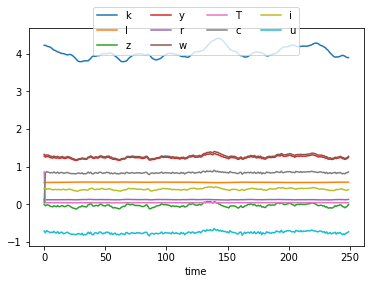

In [17]:
# one time simulation

# generate a history of Z's
T = 251  # number of observations to generate / I will drop the last one

# initialize Z
zhist = np.zeros((T,1))

# generate a history of epsilon shocks with mean zero and variance sigma-squared
σz = 0.02
epshist = np.random.randn(T,1)*σz

# iteratively generate Z's starting with the first value of Z = 0
for t in range (1,T):
    zhist[t,:] = ρ*zhist[t-1,:] + epshist[t,:]
    
# generate history of k's and l's
xbar = np.array([kbar,lbar])
xhist, temp = LinApp_SSL(xbar, zhist, xbar, takelogs, PP, QQ, RR, SS)
khist = xhist[:-1,0] # drop the last obs
lhist = xhist[1:,1]  # drop the first obs

# initialize histories of all other variables
yhist = np.zeros(T-1)
rhist = np.zeros(T-1)
whist = np.zeros(T-1)
Thist = np.zeros(T-1)
chist = np.zeros(T-1)
ihist = np.zeros(T-1)
uhist = np.zeros(T-1)

# set initial values noting we started at the steady state
yhist[0] = ybar
rhist[0] = rbar
whist[0] = wbar
Thist[0] = cbar
chist[0] = Tbar
ihist[0] = ibar
uhist[0] = ubar

# compute values for all other time periods
for t in range(1, T-1):
    yhist[t], rhist[t], whist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        modeldefs([khist[t-1], lhist[t-1]], [khist[t], lhist[t-1]], zhist[t,:], mparams)

# plot data
t = range(0, T-1)
plt.plot(t, khist, label='k')
plt.plot(t, lhist, label='l')
plt.plot(t, zhist[:-1], label='z')
plt.plot(t, yhist, label='y')
plt.plot(t, rhist, label='r')
plt.plot(t, whist, label='w')
plt.plot(t, Thist, label='T')
plt.plot(t, chist, label='c')
plt.plot(t, ihist, label='i')
plt.plot(t, uhist, label='u')
plt.xlabel('time')
plt.legend(loc=9, ncol=4, bbox_to_anchor=(0., 1.02, 1., .102))
plt.show()

Text(0, 0.5, 'Labor input')

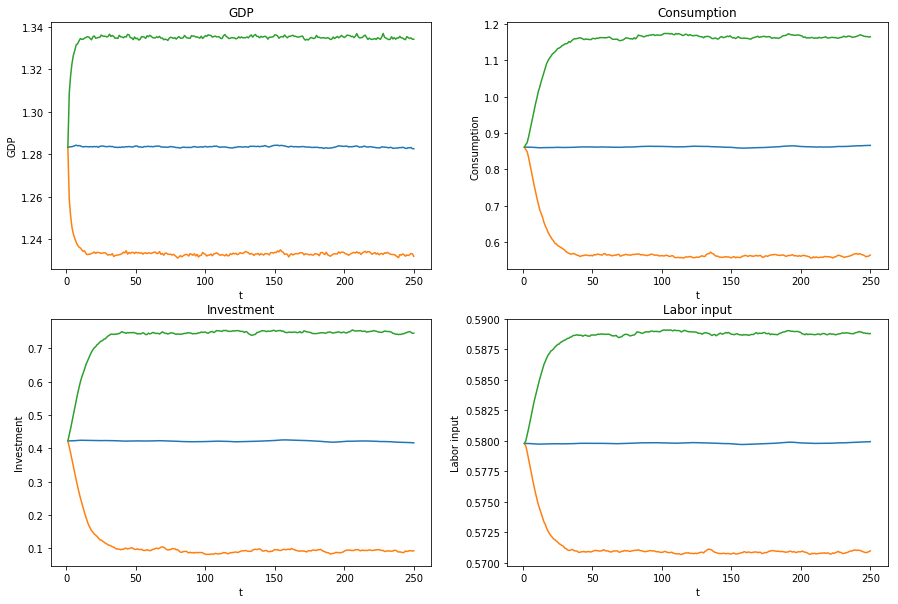

In [18]:
# 10,000 simulations and confidence bands

numSim = 10000 # number of simulations
T = 251        # number of observations for each simulation
σz = 0.02

# initialize histories of all variables
zhist = np.zeros((numSim,T))
khist = np.zeros((numSim,T))
lhist = np.zeros((numSim,T-1))
yhist = np.zeros((numSim,T-1))
rhist = np.zeros((numSim,T-1))
whist = np.zeros((numSim,T-1))
Thist = np.zeros((numSim,T-1))
chist = np.zeros((numSim,T-1))
ihist = np.zeros((numSim,T-1))
uhist = np.zeros((numSim,T-1))

# set initial values at the steady state
yhist[:,0] = ybar
rhist[:,0] = rbar
whist[:,0] = wbar
Thist[:,0] = Tbar
chist[:,0] = cbar
ihist[:,0] = ibar
uhist[:,0] = ubar

# Simulation
for sim in range(numSim):
    
    epshist = np.random.randn(T,1)*σz
    zhist_temp = np.zeros((T,1))
    
    # generate history of shocks
    for t in range (1,T):
        zhist_temp[t,:] = ρ*zhist_temp[t-1,:] + epshist[t,:]
    zhist[sim,:] = np.transpose(zhist_temp)
    
    # generate history of k's and l's
    xbar = np.array([kbar,lbar])
    xhist, temp = LinApp_SSL(xbar, zhist_temp, xbar, takelogs, PP, QQ, RR, SS)
    khist[sim,:] = np.transpose(xhist[:,0])
    lhist[sim,:] = np.transpose(xhist[1:,1])

    # compute values for all other time periods
    for t in range(1,T-1):
        yhist[sim,t], rhist[sim,t], whist[sim,t], Thist[sim,t], chist[sim,t], ihist[sim,t], uhist[sim,t] = \
            modeldefs([khist[sim,1], lhist[sim,t-1]], [khist[sim,t+1], lhist[sim,t]], zhist[sim,t], mparams)
        
# compute average and bands
y_band = np.zeros((T-1,3))
c_band = np.zeros((T-1,3))
i_band = np.zeros((T-1,3))
l_band = np.zeros((T-1,3))
for t in range(T-1):
    y_band[t,0] = np.mean(yhist[:,t])
    y_band[t,1] = np.percentile(yhist[:,t], 5)
    y_band[t,2] = np.percentile(yhist[:,t],95)

    c_band[t,0] = np.mean(chist[:,t])
    c_band[t,1] = np.percentile(chist[:,t], 5)
    c_band[t,2] = np.percentile(chist[:,t],95)
    
    i_band[t,0] = np.mean(ihist[:,t])
    i_band[t,1] = np.percentile(ihist[:,t], 5)
    i_band[t,2] = np.percentile(ihist[:,t],95)
    
    l_band[t,0] = np.mean(lhist[:,t])
    l_band[t,1] = np.percentile(lhist[:,t], 5)
    l_band[t,2] = np.percentile(lhist[:,t],95)


# plot the time-series with the averages and confidence bands
t = np.arange(1,T,1)

fig = plt.figure(figsize = [15, 10])

# GDP
GDP = fig.add_subplot(2, 2, 1)
plt.plot(t,y_band[:,0],
         t,y_band[:,1],
         t,y_band[:,2])
plt.title("GDP")
plt.xlabel("t")
plt.ylabel("GDP")

# consumption
cons = fig.add_subplot(2, 2, 2)
plt.plot(t,c_band[:,0],
         t,c_band[:,1],
         t,c_band[:,2])
plt.title("Consumption")
plt.xlabel("t")
plt.ylabel("Consumption")

# investment
cons = fig.add_subplot(2, 2, 3)
plt.plot(t,i_band[:,0],
         t,i_band[:,1],
         t,i_band[:,2])
plt.title("Investment")
plt.xlabel("t")
plt.ylabel("Investment")

# labor input
labor = fig.add_subplot(2, 2, 4)
plt.plot(t,l_band[:,0],
         t,l_band[:,1],
         t,l_band[:,2])
plt.title("Labor input")
plt.xlabel("t")
plt.ylabel("Labor input")

### Exercise 8

In [19]:
numVar = 4   # GDP, consumption, investment, labor
numStats = 6 # mean,volatility,coefficient of variation, relative volatility, persistence, cyclicality

stats_avg = np.zeros((numVar, numStats))  # to save the average values
stats_std = np.zeros((numVar, numStats))  # to save the standard errors

hist_list = [yhist, chist, ihist, lhist]  # list of time series

for index, varhist in enumerate(hist_list):
    
    temp_stats = np.zeros((numSim,numStats))
    
    for sim in range(numSim):
        temp_stats[sim,0] = np.mean(varhist[sim,:])
        temp_stats[sim,1] = np.std(varhist[sim,:])
        temp_stats[sim,2] = np.mean(varhist[sim,:]) / np.std(varhist[sim,:])
        temp_stats[sim,3] = np.std(varhist[sim,:]) / np.std(yhist[sim,:])
        temp_stats[sim,4] = np.corrcoef(varhist[sim,:-1], varhist[sim,1:])[0][1]
        temp_stats[sim,5] = np.corrcoef(varhist[sim,:], yhist[sim,:])[0][1]
    
    for i in range(numStats):
        stats_avg[index,i] = np.mean(temp_stats[:,i])
        stats_std[index,i] = np.std(temp_stats[:,i])

In [20]:
print("[the average values and standard errors for moments over the 10,000 simulations]")
print("")
varname = ["GDP", "Consumption", "Investment", "Labor input"]
for index, name in enumerate(varname):
    print(name)
    print("[mean]                    : avg = %7.3f,  SD = %6.3f" % (stats_avg[index,0], stats_std[index,0]))
    print("[volatility]              : avg = %7.3f,  SD = %6.3f" % (stats_avg[index,1], stats_std[index,1]))
    print("[coefficient of variation]: avg = %7.3f,  SD = %6.3f" % (stats_avg[index,2], stats_std[index,2]))
    print("[relative volatility]     : avg = %7.3f,  SD = %6.3f" % (stats_avg[index,3], stats_std[index,3]))
    print("[persistence]             : avg = %7.3f,  SD = %6.3f" % (stats_avg[index,4], stats_std[index,4]))
    print("[cyclicality]             : avg = %7.3f,  SD = %6.3f" % (stats_avg[index,5], stats_std[index,5]))
    print("")

[the average values and standard errors for moments over the 10,000 simulations]

GDP
[mean]                    : avg =   1.283,  SD =  0.007
[volatility]              : avg =   0.030,  SD =  0.004
[coefficient of variation]: avg =  43.733,  SD =  5.178
[relative volatility]     : avg =   1.000,  SD =  0.000
[persistence]             : avg =   0.855,  SD =  0.034
[cyclicality]             : avg =   1.000,  SD =  0.000

Consumption
[mean]                    : avg =   0.862,  SD =  0.070
[volatility]              : avg =   0.159,  SD =  0.037
[coefficient of variation]: avg =   5.723,  SD =  1.439
[relative volatility]     : avg =   5.290,  SD =  0.774
[persistence]             : avg =   0.992,  SD =  0.003
[cyclicality]             : avg =  -0.401,  SD =  0.097

Investment
[mean]                    : avg =   0.422,  SD =  0.076
[volatility]              : avg =   0.173,  SD =  0.040
[coefficient of variation]: avg =   2.574,  SD =  0.785
[relative volatility]     : avg =   5.766,  SD = 

### Exercise 9

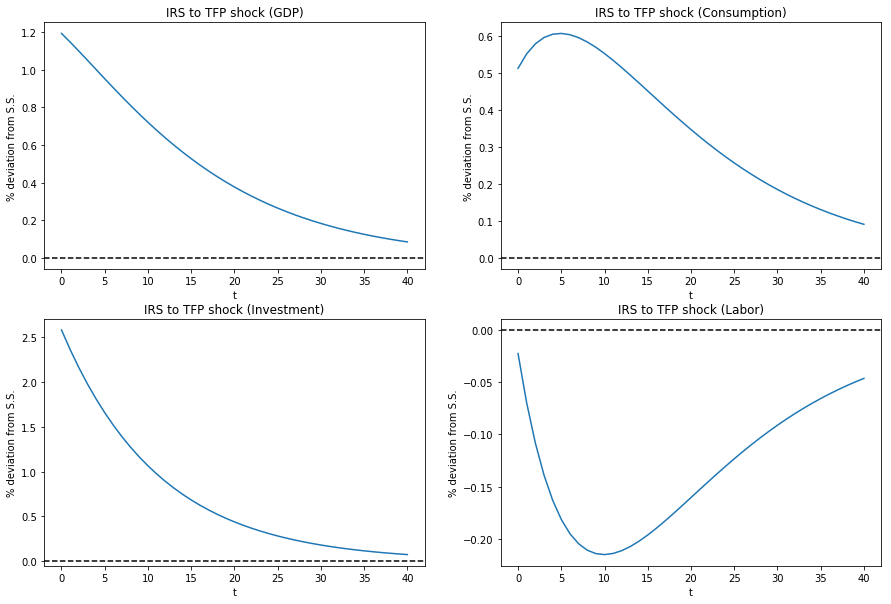

In [23]:
period = 101  # I assume that the economy converges back to the steady state in this period
T = 40        # I will plot only first T period

# generate a history of shocks
zpath = np.zeros((period,1))
zpath[1] = σz    # size of shock = one standard deviation(σz = 0.02)
for t in range(2,period):
    zpath[t,:] = ρ*zpath[t-1,:] # no more shocks hereafter
    
# generate history of k's and l's
xbar = np.array([kbar,lbar])
xpath, temp = LinApp_SSL(xbar, zpath, xbar, takelogs, PP, QQ, RR, SS)
kpath = xpath[:,0]
lpath = xpath[1:,1]

# initialize histories of all other variables
ypath = np.ones(period-1)*ybar
rpath = np.ones(period-1)*rbar
wpath = np.ones(period-1)*wbar
Tpath = np.ones(period-1)*Tbar
cpath = np.ones(period-1)*cbar
ipath = np.ones(period-1)*ibar
upath = np.ones(period-1)*ubar

# compute values for all other time periods
for t in range(1, period-1):
    ypath[t], rpath[t], wpath[t], Tpath[t], cpath[t], ipath[t], upath[t] = \
        modeldefs([kpath[t], lpath[t-1]], [kpath[t+1], lpath[t]], zpath[t,:], mparams)

# normalization
IRS_y = np.zeros(period-1)
IRS_c = np.zeros(period-1)
IRS_i = np.zeros(period-1)
IRS_l = np.zeros(period-1)

for t in range(period-1):
    IRS_y[t] = (ypath[t] - ybar) / ybar * 100
    IRS_c[t] = (cpath[t] - cbar) / cbar * 100
    IRS_i[t] = (ipath[t] - ibar) / ibar * 100
    IRS_l[t] = (lpath[t] - lbar) / lbar * 100
    
# plot the time-series with the averages and confidence bands
t = np.arange(T+1)

fig = plt.figure(figsize = [15, 10])

# GDP
GDP_IRS = fig.add_subplot(2, 2, 1)
plt.plot(t,IRS_y[1:T+2])
plt.title("IRS to TFP shock (GDP)")
plt.xlabel("t")
plt.ylabel("% deviation from S.S.")
plt.axhline(y=0, color='black', linestyle='--')

# Consumption
Cons_IRS = fig.add_subplot(2, 2, 2)
plt.plot(t,IRS_c[1:T+2])
plt.title("IRS to TFP shock (Consumption)")
plt.xlabel("t")
plt.ylabel("% deviation from S.S.")
plt.axhline(y=0, color='black', linestyle='--')

# Investment
Investment_IRS = fig.add_subplot(2, 2, 3)
plt.plot(t,IRS_i[1:T+2])
plt.title("IRS to TFP shock (Investment)")
plt.xlabel("t")
plt.ylabel("% deviation from S.S.")
plt.axhline(y=0, color='black', linestyle='--')

# Labor
Labor_IRS = fig.add_subplot(2, 2, 4)
plt.plot(t,IRS_l[1:T+2])
plt.title("IRS to TFP shock (Labor)")
plt.xlabel("t")
plt.ylabel("% deviation from S.S.")
plt.axhline(y=0, color='black', linestyle='--')

### End